In [22]:
import wfdb
import numpy as np
from scipy.signal import lfilter,group_delay
from utils import *
from matplotlib import pyplot as plt

/home/mrtipson/Documents/OBBS/utils.py:32: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


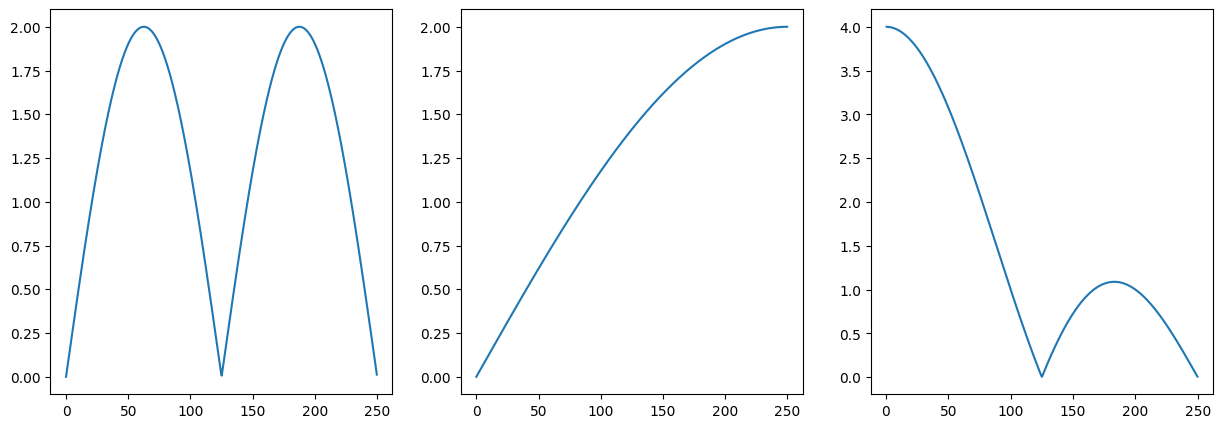

In [3]:
transferCharacteristic1(4,1)

In [3]:
group_delay(([1,0,0,0,-1], [1,-1,0,0,0]))[1]

/tmp/ipykernel_2712/1863078668.py:1: UserWarning: The group delay is singular at frequencies [0.000], setting to 0
  group_delay(([1,0,0,0,-1], [1,-1,0,0,0]))[1]


array([ 0.00000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  1.50000000e+00,  1.50000000e+00,  1.50000000e+00,
        1.50000000e+00,  

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


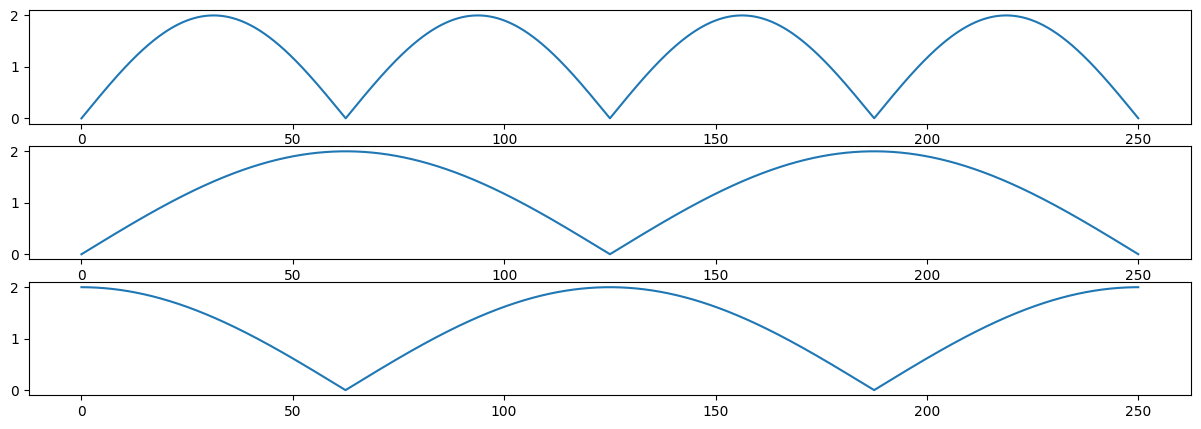

In [4]:
transferCharacteristic4(-1,-1,8,4,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


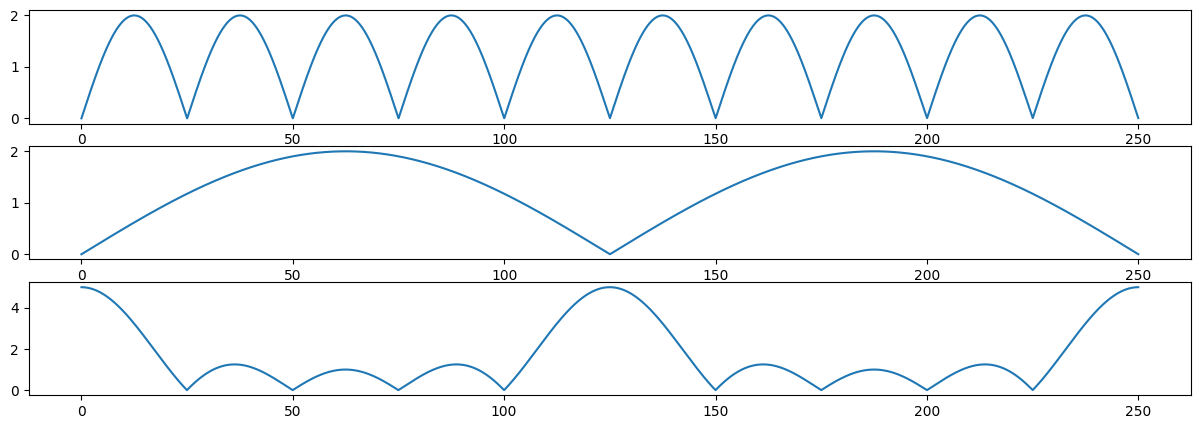

In [5]:
transferCharacteristic4(-1,-1,20,4,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


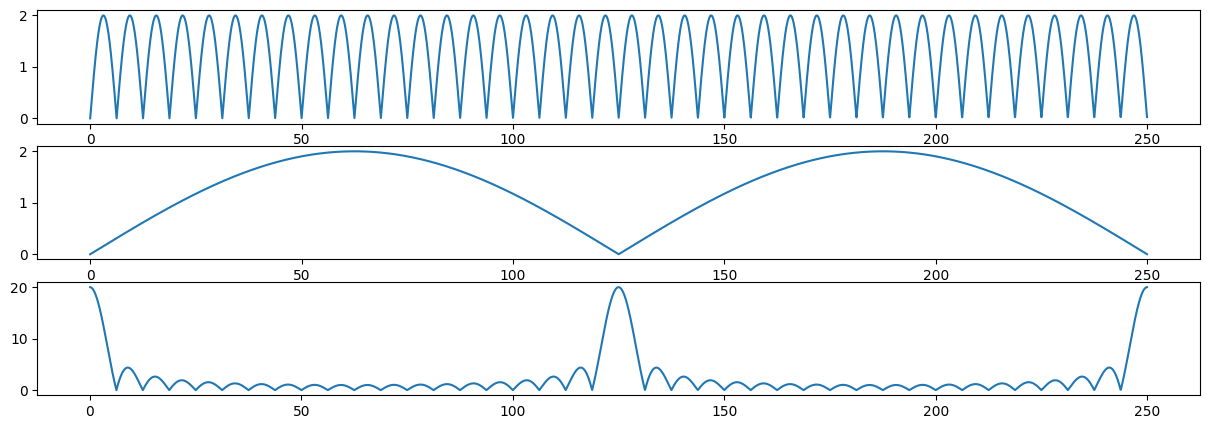

In [6]:
transferCharacteristic4(-1,-1,80,4,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


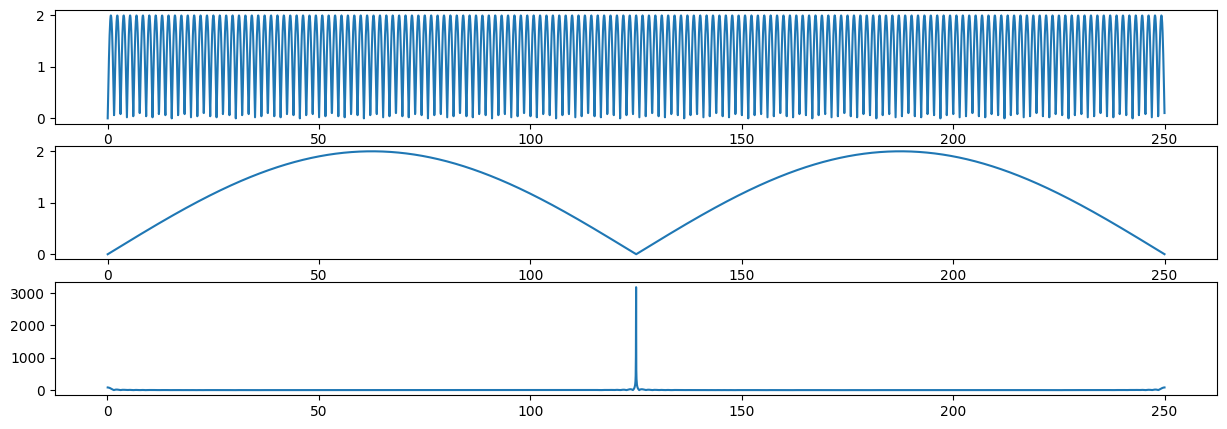

In [7]:
transferCharacteristic4(-1,-1,330,4,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


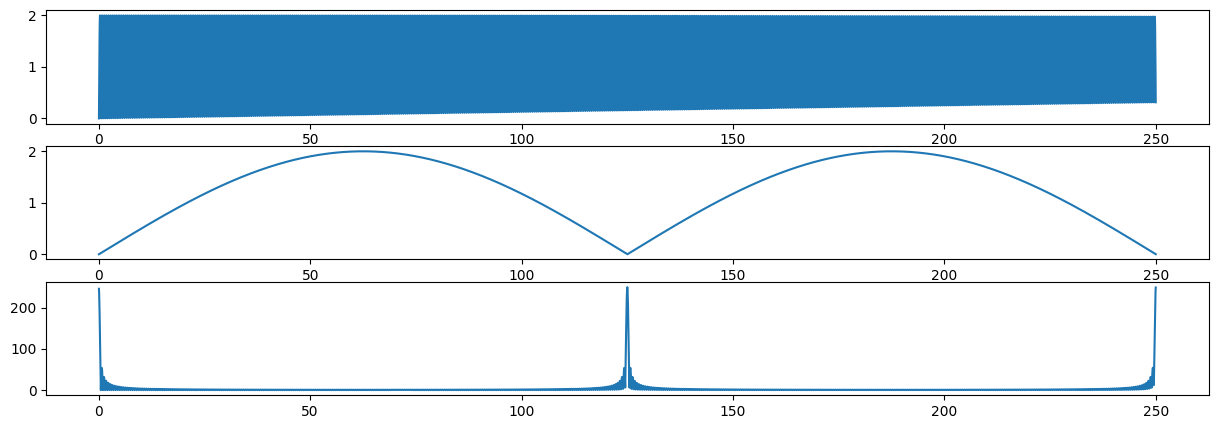

In [8]:
transferCharacteristic4(-1,-1,1000,4,1,1)

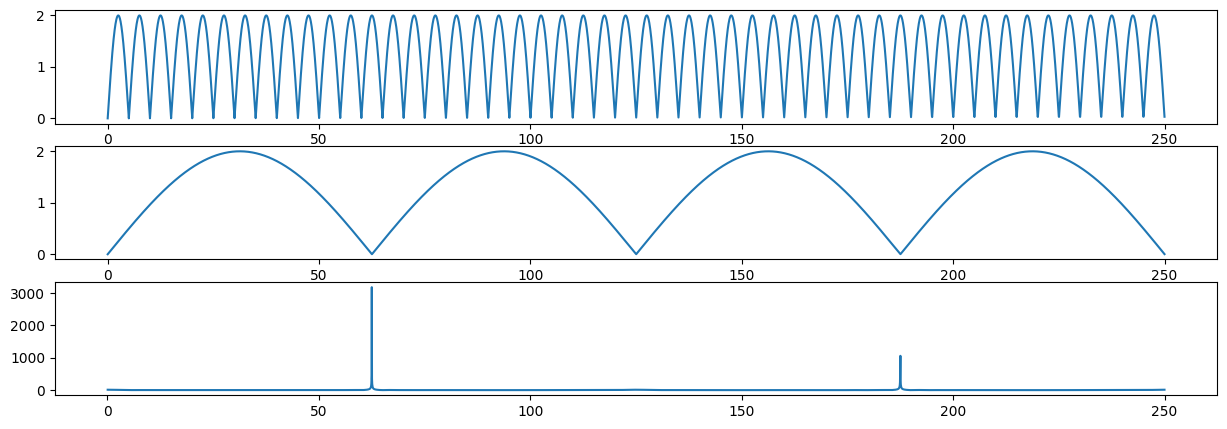

In [10]:
transferCharacteristic4(-1,-1,100,8,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


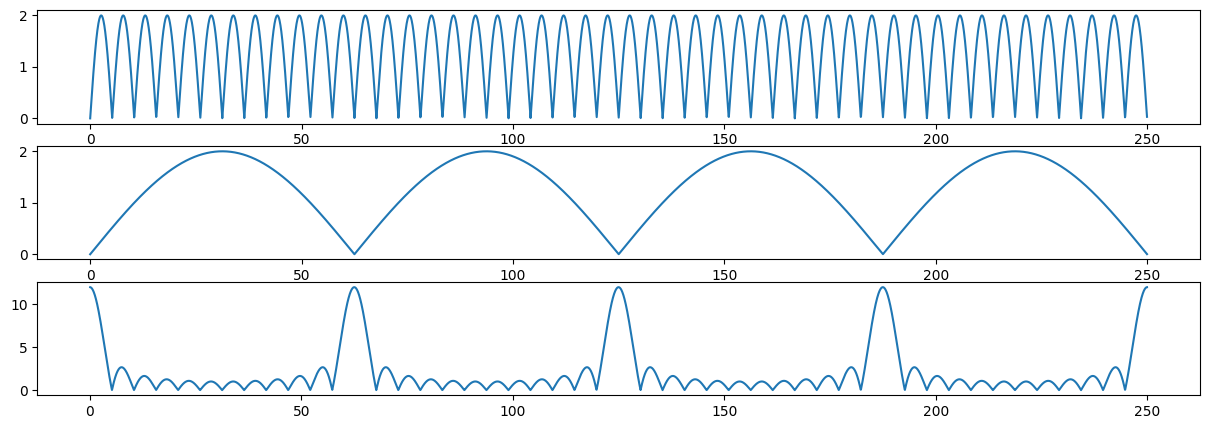

In [11]:
transferCharacteristic4(-1,-1,8*12,8,1,1)

/home/mrtipson/Documents/OBBS/utils.py:80: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


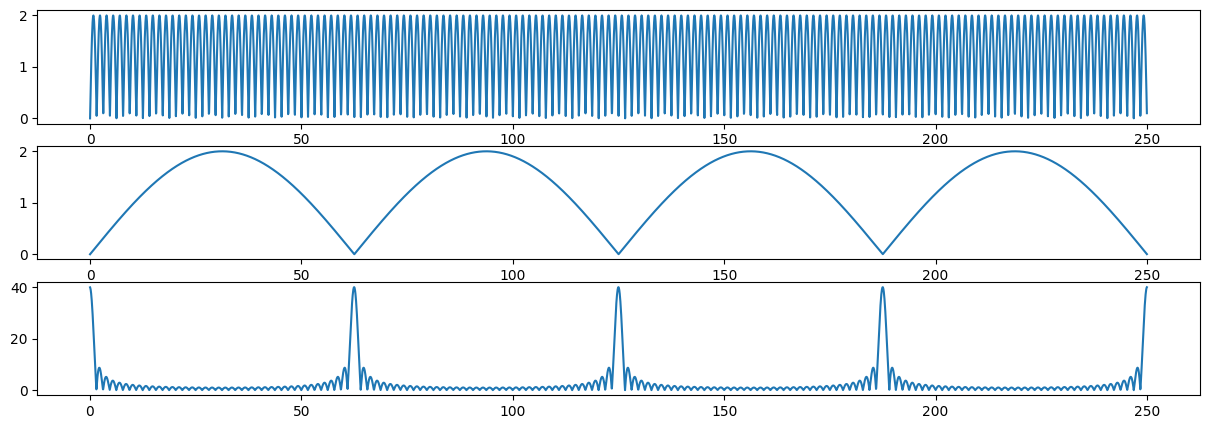

In [12]:
transferCharacteristic4(-1,-1,8*40,8,1,1)

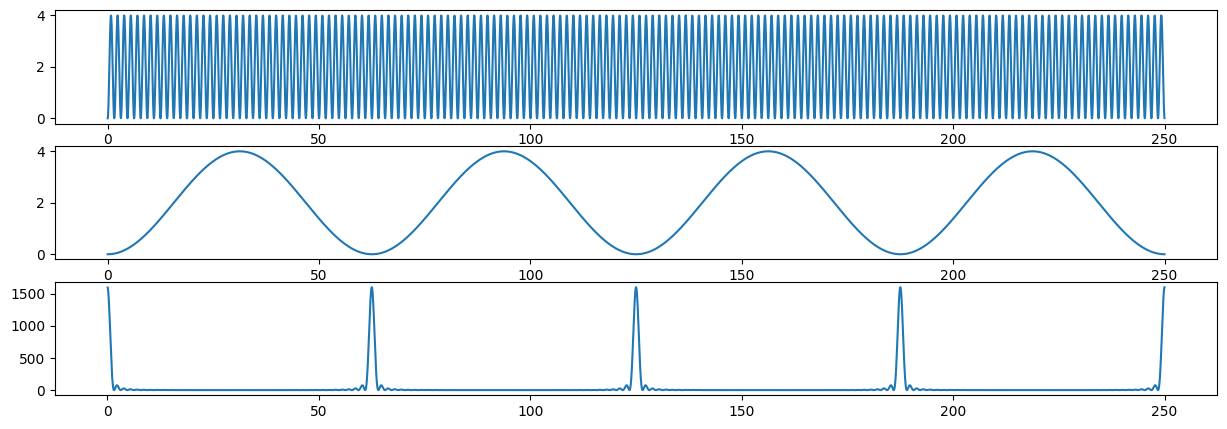

In [13]:
transferCharacteristic4(-1,-1,8*40,8,2,2)

In [14]:
b = [1] + [0]*(330-1) + [-1]
a = [1] + [0]*(10-1) + [-1]
# noise = lfilter(b,a,ecg)
# y'(n) je filtritan signal
# y(n) = x(n-D) - y'(n)/G
# G = (330/10)^2
# D = (330-10)/2*M
# ga normiramo z G, ker ima filter neko ojačanje
# H5(z) => z^(-M(m-n)/2)

/home/mrtipson/Documents/OBBS/utils.py:97: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


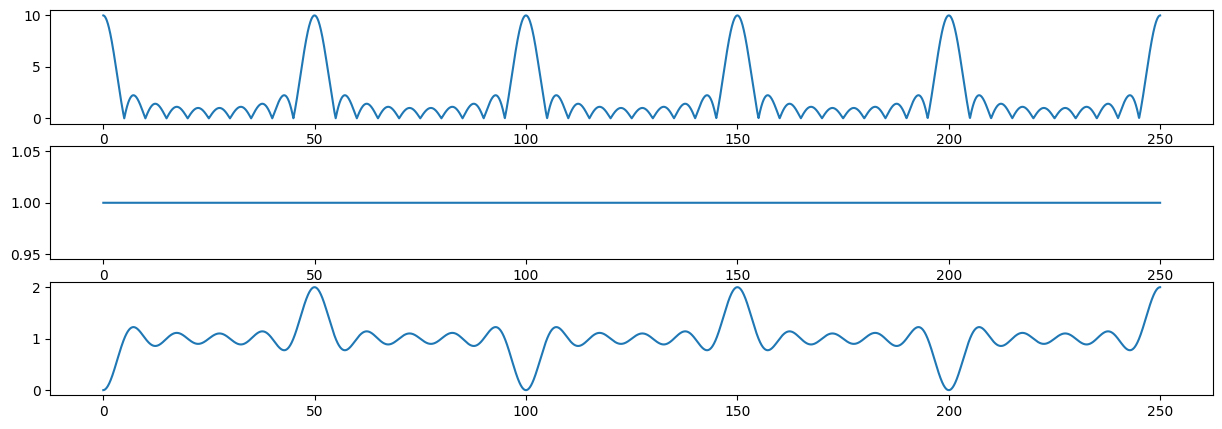

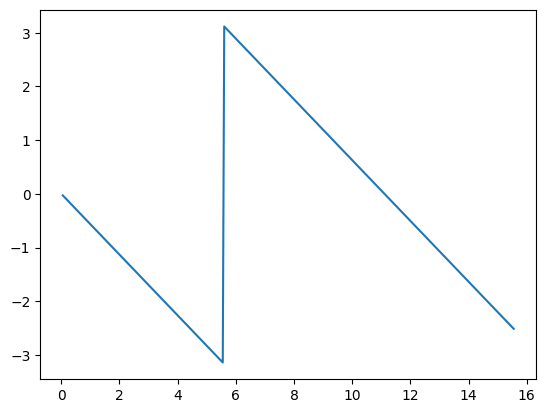

In [15]:
transferCharacteristic5(-1,-1,100,10,1,1)

/home/mrtipson/Documents/OBBS/utils.py:97: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


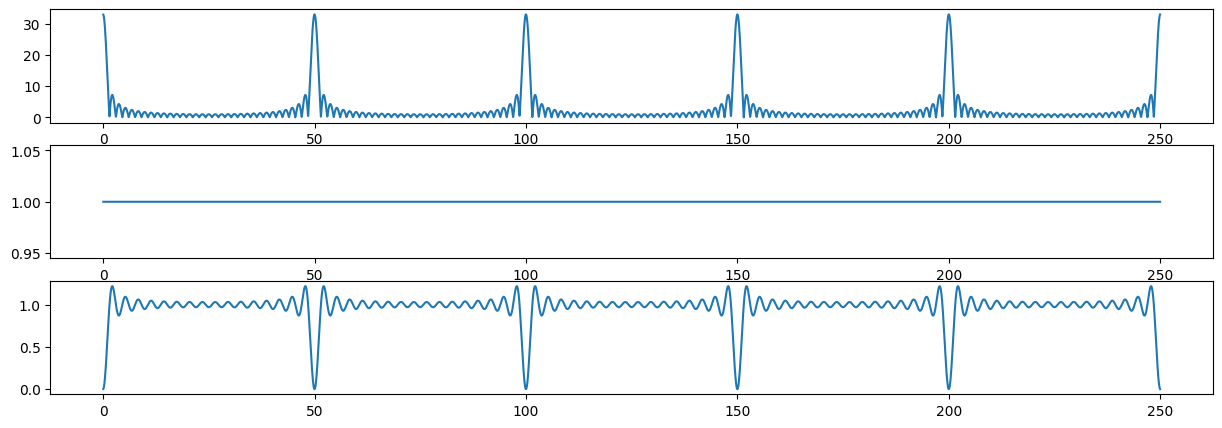

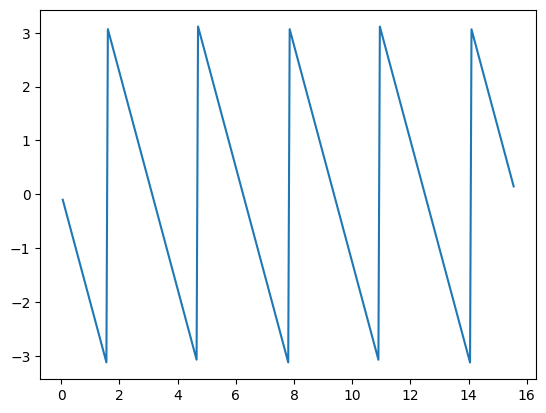

In [16]:
transferCharacteristic5(-1,-1,330,10,1,1)

/home/mrtipson/Documents/OBBS/utils.py:97: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


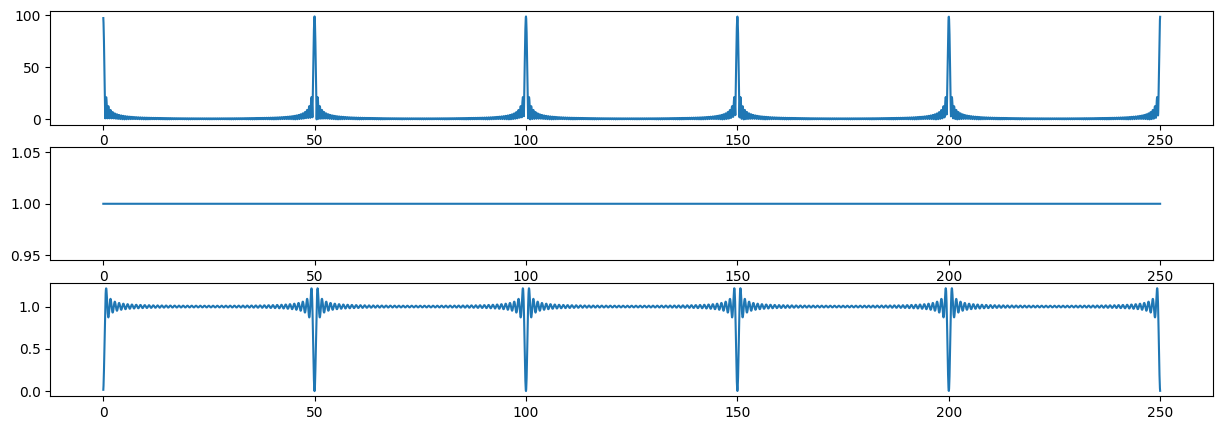

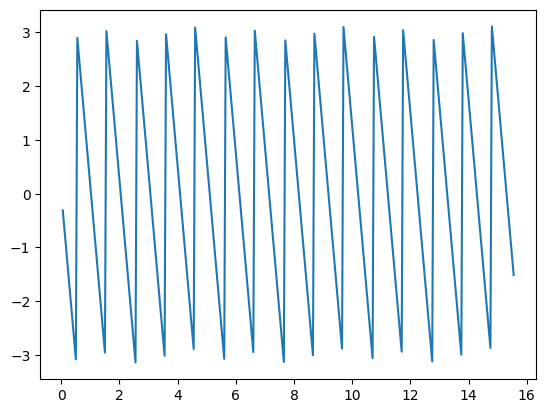

In [17]:
transferCharacteristic5(-1,-1,990,10,1,1)

/home/mrtipson/Documents/OBBS/utils.py:97: RuntimeWarning: invalid value encountered in divide
  fn3 = fn1/fn2


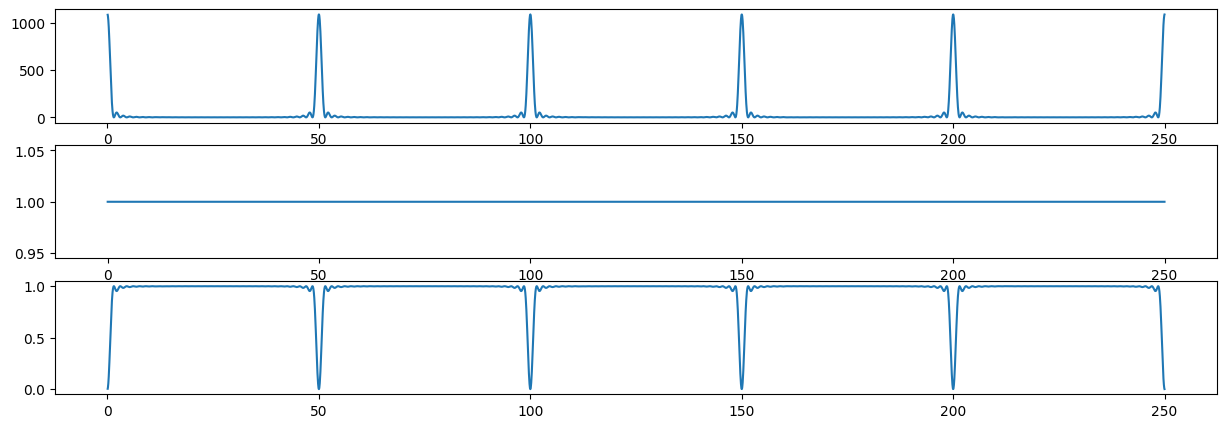

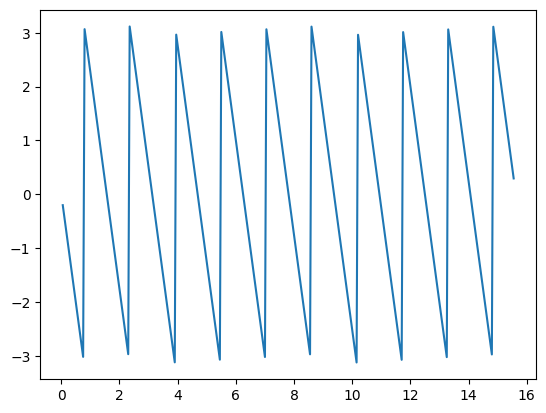

In [18]:
transferCharacteristic5(-1,-1,330,10,2,2)

/home/mrtipson/Documents/OBBS/utils.py:121: RuntimeWarning: invalid value encountered in divide
  fn2 = (1-np.exp(-1j*2*np.pi*(f/Fs)*n)) / (1-np.exp(-1j*2*np.pi*(f/Fs)))


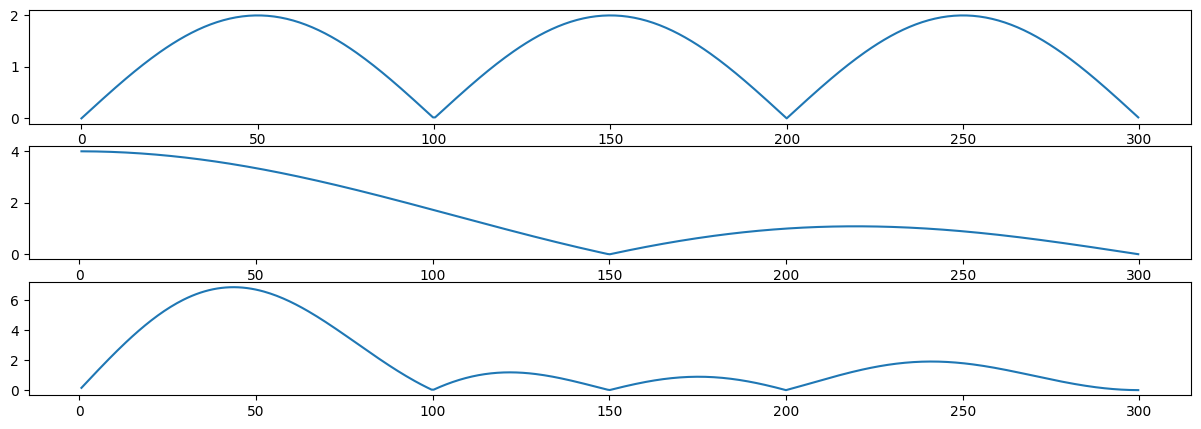

In [19]:
transferCharacteristic6(600,6,1,4)

/home/mrtipson/Documents/OBBS/utils.py:121: RuntimeWarning: invalid value encountered in divide
  fn2 = (1-np.exp(-1j*2*np.pi*(f/Fs)*n)) / (1-np.exp(-1j*2*np.pi*(f/Fs)))


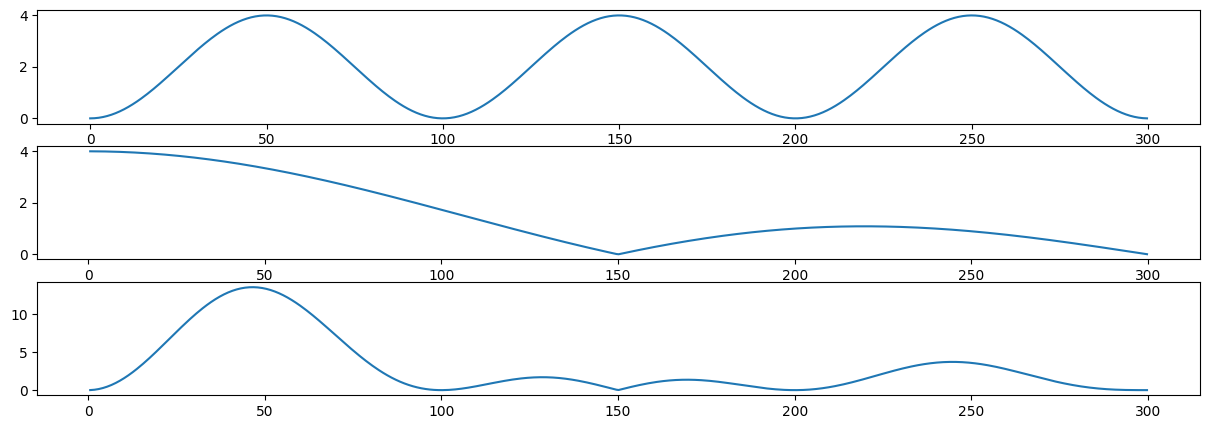

In [20]:
transferCharacteristic6(600,6,2,4)

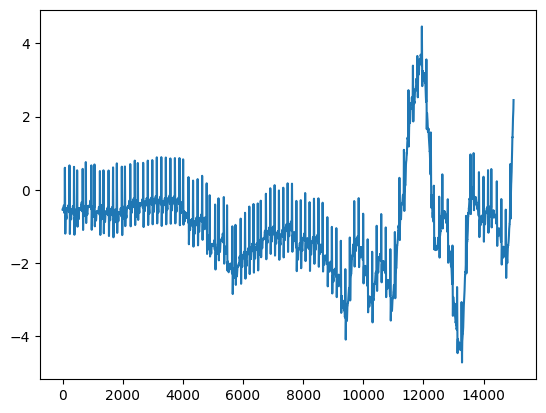

In [27]:
_, meta = wfdb.rdsamp("s20501", sampfrom=0, sampto=1)
signals, meta = wfdb.rdsamp("s20501", sampfrom=34*60*meta["fs"], sampto=35*60*meta["fs"])
sig = signals[:,1]
xax = np.arange(signals.shape[0])
plt.plot(xax, sig)

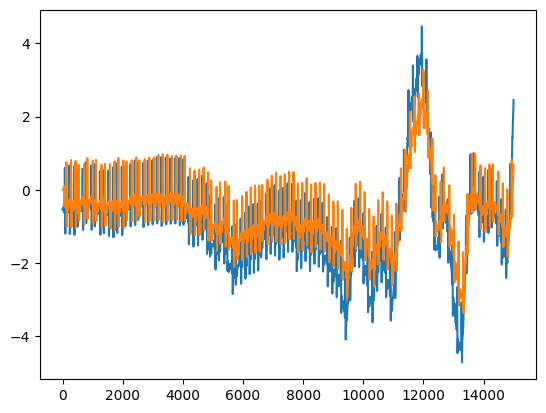

In [30]:
from scipy.signal import firwin
b = firwin(101,0.8/(meta["fs"]/2),pass_zero="highpass")
a = 1

plt.plot(xax, sig)
plt.plot(xax, lfilter(b,a,sig))

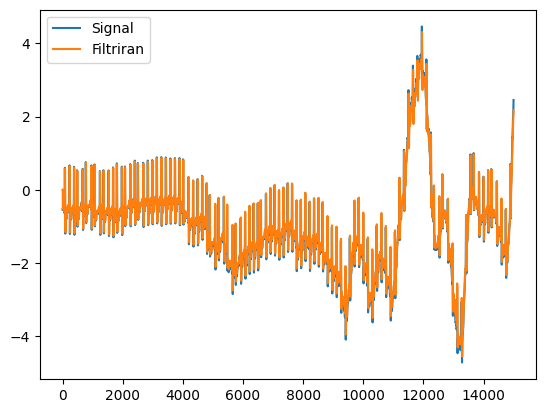

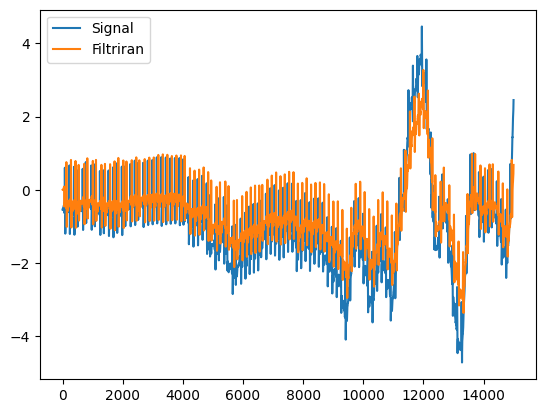

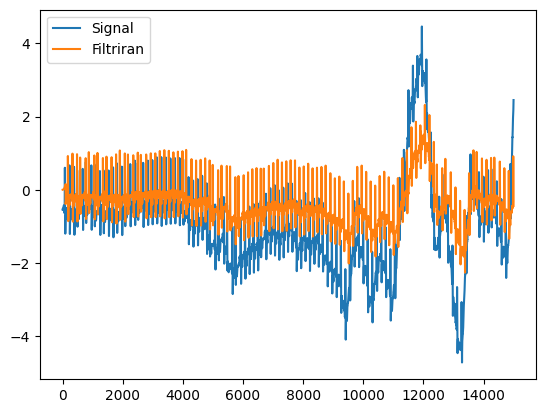

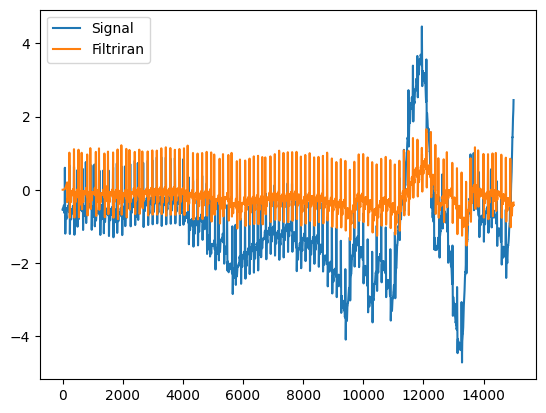

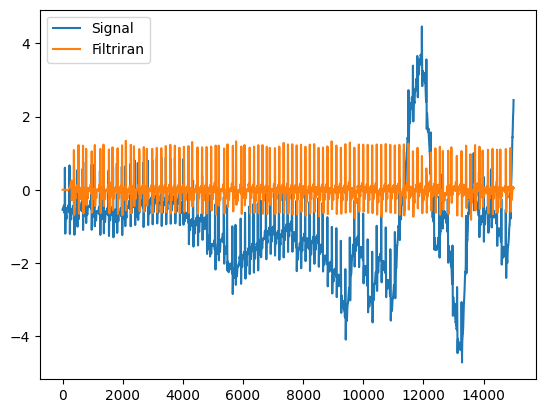

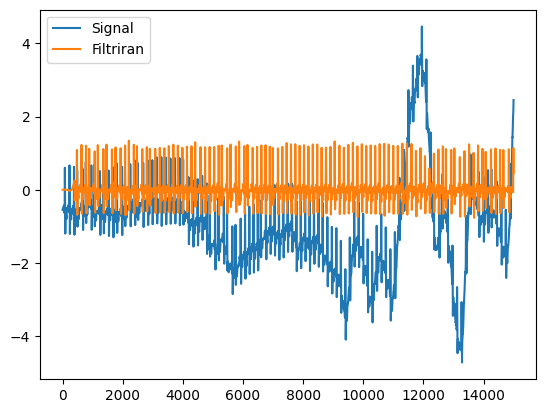

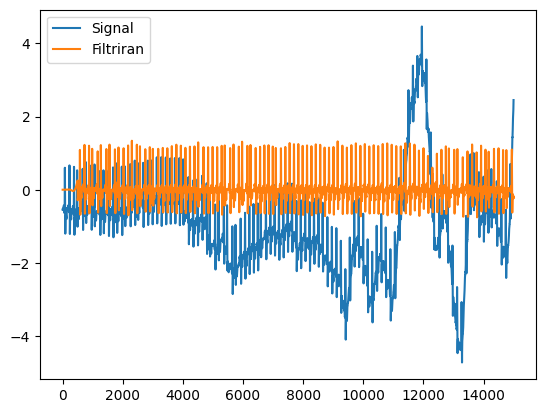

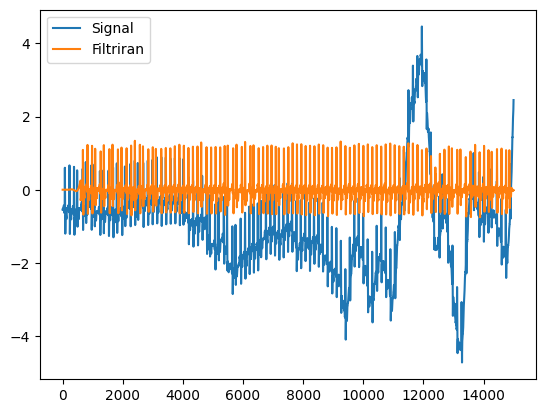

In [31]:
lwFreq = 0.8 / (250.0 / 2)
allN = [10, 100, 200, 300, 600, 800, 1000, 1200]
for n in allN:
    b = firwin(n+1, lwFreq, pass_zero='highpass');
    flt = lfilter(b,1,sig)
    plt.plot(xax, sig, label="Signal")
    plt.plot(xax, flt, label="Filtriran")
    plt.legend()
    plt.show()

/home/mrtipson/.local/lib/python3.11/site-packages/numpy/lib/polynomial.py:779: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv
/home/mrtipson/.local/lib/python3.11/site-packages/numpy/lib/polynomial.py:779: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv
/usr/lib64/python3.11/site-packages/scipy/signal/_filter_design.py:188: RuntimeWarning: invalid value encountered in divide
  h = polyval(b, s) / polyval(a, s)
/home/mrtipson/.local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


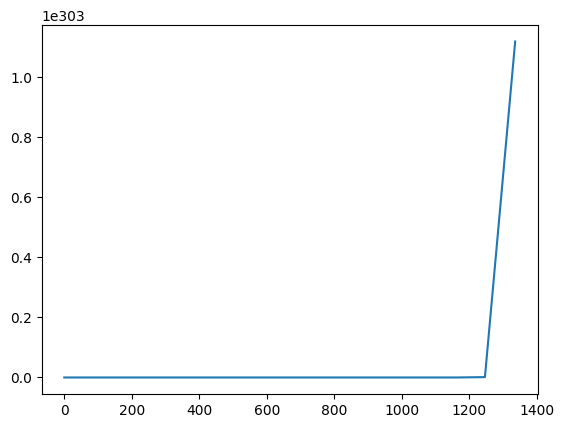

In [36]:
from scipy.signal import freqs
b = firwin(101, 35/(250/2), pass_zero="lowpass")
w,f = freqs(b,[1],plot=plt.plot)